<a href="https://colab.research.google.com/github/xscbsx/udacity-data-scientist-nanodegree/blob/main/Project_1_Data_Science_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Udacity Data Scientist Nanodegree - Project 1 (Data Science Blog Post)
In this project, we analyzed data of more than 200 data scientist job positions extracted from  www.glassdoor.com during the year of 2020, with features such as:

*   Salary Estimate
*   Location
*   Company Name
*   Job Description


# Questions


1.   Which companies have the most number of data scientist positions?
2.   What's the most frequent salary estimate?
3.   Which cities offer more job opportunities?






# **Data overview**
In this section, we analysed the number of columns, rows and types of data. With those informations, we can proceed with the data analyses.

In [2]:
#Importing libraries 
import pandas as pd #data analysis
import matplotlib.pyplot as plt #data visualization
% matplotlib inline

In [4]:
#uploading the file
from google.colab import files
uploaded = files.upload()

Saving dataset-article.csv to dataset-article.csv


In [16]:
#creating the dataframe
dataframe= pd.read_csv('dataset-article.csv',engine= 'python',sep=',', quotechar='"')

In [6]:
#Checking the first 5 rows of the dataset
dataframe.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),ABOUT HOPPER\n\nAt Hopper weâ€™re on a mission...,35,Hopper\n3.5,New York NY,Montreal Canada,501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1
1,Data Scientist Product Analytics,$111K-$181K (Glassdoor est.),At Noom we use scientifically proven methods t...,45,Noom US\n4.5,New York NY,New York NY,1001 to 5000 employees,2008,Company - Private,Health Care & Pharmaceuticals,Consumer Services,Unknown / Non-Applicable,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-10,Decode_M,New York NY,New York NY,1 to 50 employees,-1,Unknown,Research & Development,-1,Unknown / Non-Applicable,-1
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,34,Sapphire Digital\n3.4,Lyndhurst NJ,Lyndhurst NJ,201 to 500 employees,2019,Company - Private,Tech Companies,Information Technology,Unknown / Non-Applicable,Zocdoc Healthgrades
4,Director Data Science,$111K-$181K (Glassdoor est.),Director Data Science - (200537)\nDescription\...,34,United Entertainment Group\n3.4,New York NY,New York NY,51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,BBDO Grey Group Droga5


In [7]:
#Check dataframe info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          6813 non-null   object
 1   Salary Estimate    6819 non-null   object
 2   Job Description    6818 non-null   object
 3   Rating             6819 non-null   int64 
 4   Company Name       6819 non-null   object
 5   Location           6819 non-null   object
 6   Headquarters       6819 non-null   object
 7   Size               6819 non-null   object
 8   Founded            6819 non-null   int64 
 9   Type of ownership  6819 non-null   object
 10  Industry           6816 non-null   object
 11  Sector             6819 non-null   object
 12  Revenue            6819 non-null   object
 13  Competitors        6819 non-null   object
dtypes: int64(2), object(12)
memory usage: 746.0+ KB


In [8]:
#Checking the number of columns and rows in the dataset
dataframe.shape

(6819, 14)

In [9]:
#checking the colummns
dataframe.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [11]:
#checking the data types 
dataframe.dtypes

Job Title            object
Salary Estimate      object
Job Description      object
Rating                int64
Company Name         object
Location             object
Headquarters         object
Size                 object
Founded               int64
Type of ownership    object
Industry             object
Sector               object
Revenue              object
Competitors          object
dtype: object

# **Data cleaning**

After checking the overview of the dataframe, there are few changes we need to make:


1.   Delete unnecessary columns
2.   Deal with null values 
3.   Replace some strings



In [17]:
#Checking if there are null values
dataframe.isna().sum()

Job Title            6
Salary Estimate      0
Job Description      1
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             3
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [18]:
#Dropping unnecessary columns 
dataframe=dataframe.drop(['Rating','Founded','Revenue','Competitors','Headquarters','Sector'],axis=1)

In [19]:
#Adjusting the format of data of the Salary Estimate colummn ( Before:$37K-$66K (Glassdoor est.) After: $37K-$66K)
dataframe['Salary Estimate']=dataframe['Salary Estimate'].str[:11]
dataframe['Salary Estimate']

0       $111K-$181K
1       $111K-$181K
2       $111K-$181K
3       $111K-$181K
4       $111K-$181K
           ...     
6814    $55K-$112K 
6815    $55K-$112K 
6816    $55K-$112K 
6817    $55K-$112K 
6818    $55K-$112K 
Name: Salary Estimate, Length: 6819, dtype: object

In [20]:
#replace all the "-1"/'Unknown' values to null values
dataframe=dataframe.replace(['Unknown','-1'],None)
dataframe

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Type of ownership,Industry
0,Senior Data Scientist,$111K-$181K,ABOUT HOPPER\n\nAt Hopper weâ€™re on a mission...,Hopper\n3.5,New York NY,501 to 1000 employees,Company - Private,Travel Agencies
1,Data Scientist Product Analytics,$111K-$181K,At Noom we use scientifically proven methods t...,Noom US\n4.5,New York NY,1001 to 5000 employees,Company - Private,Health Care & Pharmaceuticals
2,Data Science Manager,$111K-$181K,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,New York NY,1 to 50 employees,Company - Private,Research & Development
3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,Lyndhurst NJ,201 to 500 employees,Company - Private,Tech Companies
4,Director Data Science,$111K-$181K,Director Data Science - (200537)\nDescription\...,United Entertainment Group\n3.4,New York NY,51 to 200 employees,Company - Private,Advertising & Marketing
...,...,...,...,...,...,...,...,...
6814,AWS Data Engineer,$55K-$112K,About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,Dublin OH,201 to 500 employees,Company - Private,IT Services
6815,Data Analyst Ã¢ Junior,$55K-$112K,Job description\nInterpret data analyze result...,"Staffigo Technical Services, LLC\n5.0",Columbus OH,51 to 200 employees,Company - Private,IT Services
6816,Security Analytics Data Engineer,$55K-$112K,Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.\n3.8",Dublin OH,5001 to 10000 employees,Company - Private,Staffing & Outsourcing
6817,Security Analytics Data Engineer,$55K-$112K,The Security Analytics Data Engineer will inte...,Data Resource Technologies\n4.0,Dublin OH,1 to 50 employees,Company - Private,Accounting


In [25]:
#Deleting null values. Before: 6819 rows // After: 6809 rows 
dataframe=dataframe.dropna(axis=0,how='any')
dataframe

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Type of ownership,Industry
0,Senior Data Scientist,$111K-$181K,ABOUT HOPPER\n\nAt Hopper weâ€™re on a mission...,Hopper\n3.5,New York NY,501 to 1000 employees,Company - Private,Travel Agencies
1,Data Scientist Product Analytics,$111K-$181K,At Noom we use scientifically proven methods t...,Noom US\n4.5,New York NY,1001 to 5000 employees,Company - Private,Health Care & Pharmaceuticals
2,Data Science Manager,$111K-$181K,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,New York NY,1 to 50 employees,Company - Private,Research & Development
3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,Lyndhurst NJ,201 to 500 employees,Company - Private,Tech Companies
4,Director Data Science,$111K-$181K,Director Data Science - (200537)\nDescription\...,United Entertainment Group\n3.4,New York NY,51 to 200 employees,Company - Private,Advertising & Marketing
...,...,...,...,...,...,...,...,...
6814,AWS Data Engineer,$55K-$112K,About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,Dublin OH,201 to 500 employees,Company - Private,IT Services
6815,Data Analyst Ã¢ Junior,$55K-$112K,Job description\nInterpret data analyze result...,"Staffigo Technical Services, LLC\n5.0",Columbus OH,51 to 200 employees,Company - Private,IT Services
6816,Security Analytics Data Engineer,$55K-$112K,Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.\n3.8",Dublin OH,5001 to 10000 employees,Company - Private,Staffing & Outsourcing
6817,Security Analytics Data Engineer,$55K-$112K,The Security Analytics Data Engineer will inte...,Data Resource Technologies\n4.0,Dublin OH,1 to 50 employees,Company - Private,Accounting


In [40]:
def agg_salary (salary1,salary2):
  '''
    
    Aggregate the salary values with similar range.
    
    Parameters:
    salary1: Salary to be replaced
    salary2: Salary that is gonna aggregate the other salary category
    
    
    Returns:
   top 10 salaries of the dataframe with the updated data
    
    '''
  dataframe['Salary Estimate']=dataframe['Salary Estimate'].replace('salary1','salary2')
  return dataframe['Salary Estimate'].value_counts().head(10)

In [42]:
agg_salary('$85K-$159K','$84K-$156K')
agg_salary('$94K-$151K','$93K-$151K')
agg_salary('$97K-$159K','$98K-$152K')
agg_salary('$46K-$82K','$46K-$91K')

$93K-$151K     124
$71K-$122K     120
$111K-$175K    120
$100K-$172K     74
$97K-$159K      64
$135K-$214K     62
$98K-$152K      62
$12K-$111K      62
$150K-$169K     62
$60K-$124K      62
Name: Salary Estimate, dtype: int64

# **Data visualization**
In this section, we analyse how the data of the most important columns looks like. 

In [72]:
# Data Visualization
def top10_chart(dataframe, column, title,kind):
    '''
    
    Displays a bar chart with the top 10 values of the column.
    
    Parameters:
    dataframe: current dataframe
    column: column of the dataframe
    title: title of the chart
    
    Returns:
    None
    
    '''
    top10_chart = dataframe[column].value_counts()
    plt.figure(figsize=(15,10))
    (top10_chart[:10]/dataframe.shape[0]).plot(kind=kind);
    plt.title(title);

1. **Which companies have high number of data scientist job positions?**

As you can see on the graph bellow, the top 5 companies are: Apple,IBM,  Amazon, Staffigo Technical Services and Facebook

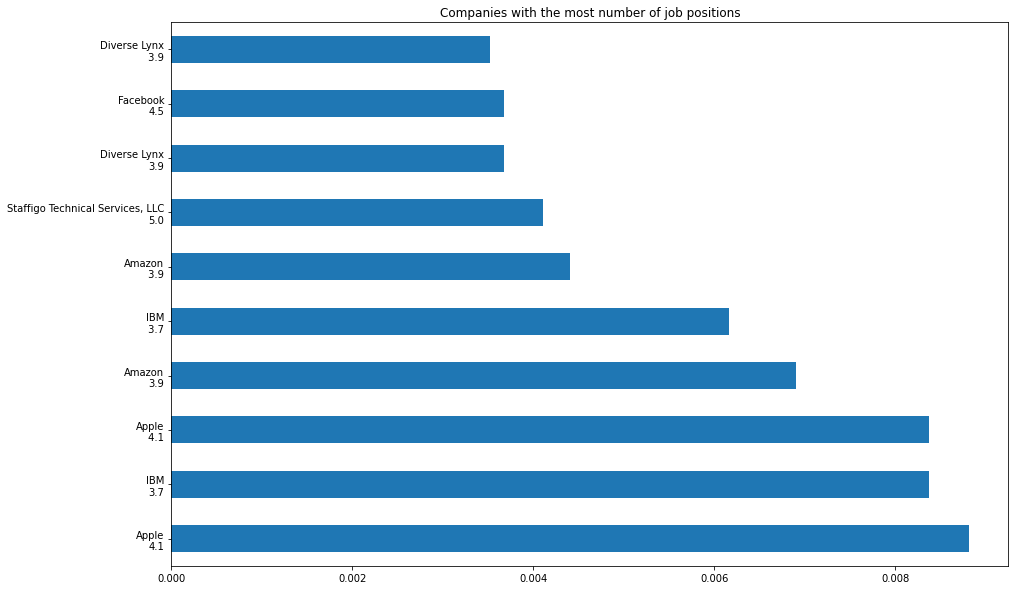

In [78]:
top10_chart(dataframe,'Company Name','Companies with the most number of job positions','barh')

**2.   What's the most frequent salary estimate?**

The most frequenty salary estimate for data scientists is 93k-151k. 

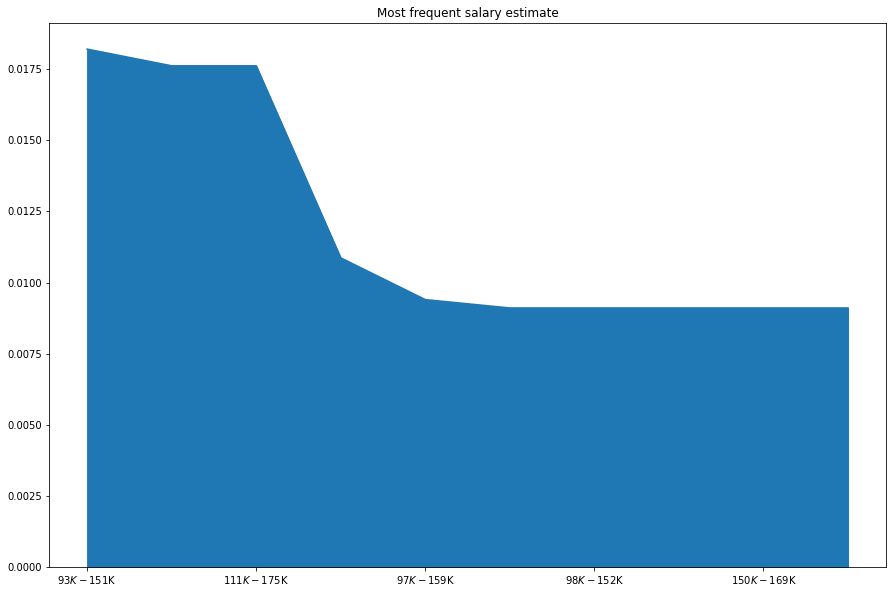

In [82]:
top10_chart(dataframe,'Salary Estimate','Most frequent salary estimate','area')

3. **Which cities offer more job opportunities?**
The city that most offer jobs for data scientists is New York

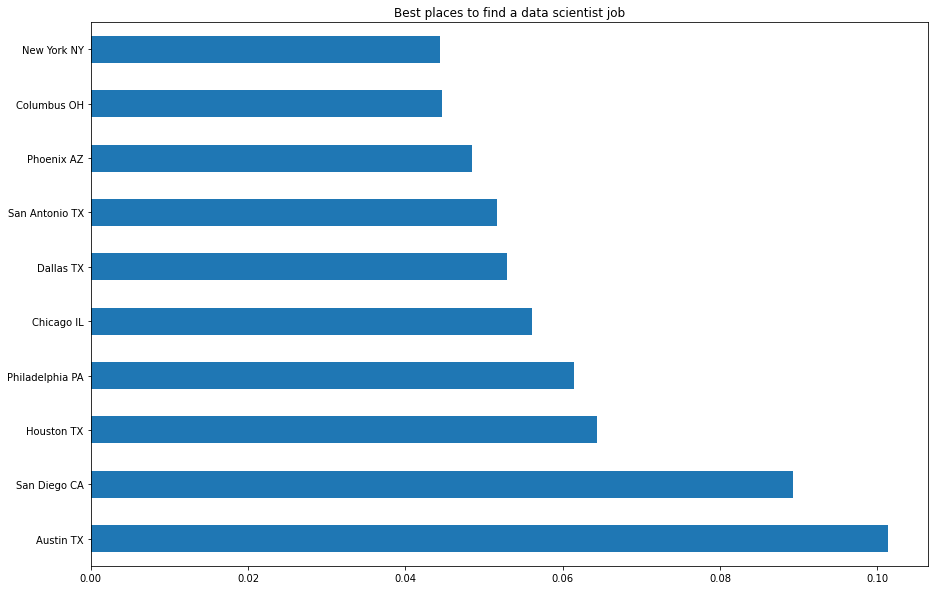

In [86]:
top10_chart(dataframe,'Location','Best places to find a data scientist job','barh')